# Single-cell RNA-seqs analysis using Python  
## Practicals 02: Dimensionality reduction, clustering, and annotation

Adapted from:  
Single-cell best practices  
www.sc-best-practices.org

Activate `sc_py_training` with the following before opening this notebook.  
```
conda activate sc_py_training
```

and then to open the notebook type 

```
conda activate sc_py_training
```

### Import scanpy library and set up the general settings


In [27]:
import scanpy as sc

sc.settings.verbosity = 3
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

### Load the anndata object from the previous practical ( after the feature selection step ) 

In [21]:

adata = sc.read(
    filename="../training_data/s4d8_feature_selection.h5ad",
    backup_url="https://figshare.com/ndownloader/files/40016014",
)

In [22]:
adata

AnnData object with n_obs × n_vars = 14814 × 20171
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'scDblFinder_score', 'scDblFinder_class', 'size_factors'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_deviant', 'binomial_deviance'
    layers: 'analytic_pearson_residuals', 'counts', 'log1p_norm', 'scran_normalization', 'soupX_counts'

## 1.  Dimensionality Reduction


In [23]:
adata.X = adata.layers["log1p_norm"]

### 1.1 PCA

In [24]:
# setting highly variable as highly deviant to use scanpy 'use_highly_variable' argument in sc.pp.pca
adata.var["highly_variable"] = adata.var["highly_deviant"]
sc.tl.pca(adata, svd_solver="arpack", use_highly_variable=True)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:07)


In [42]:
adata

AnnData object with n_obs × n_vars = 14814 × 20171
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'scDblFinder_score', 'scDblFinder_class', 'size_factors'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_deviant', 'binomial_deviance', 'highly_variable'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'analytic_pearson_residuals', 'counts', 'log1p_norm', 'scran_normalization', 'soupX_counts'

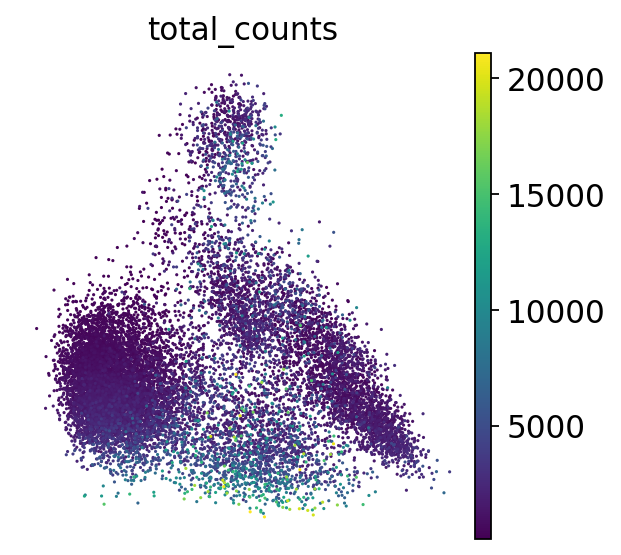

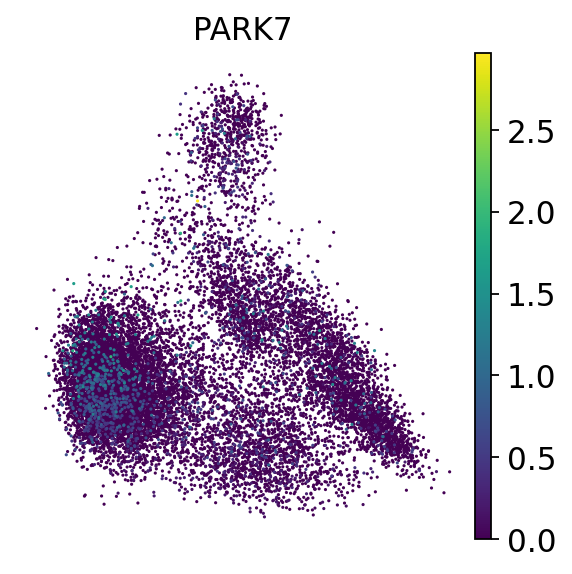

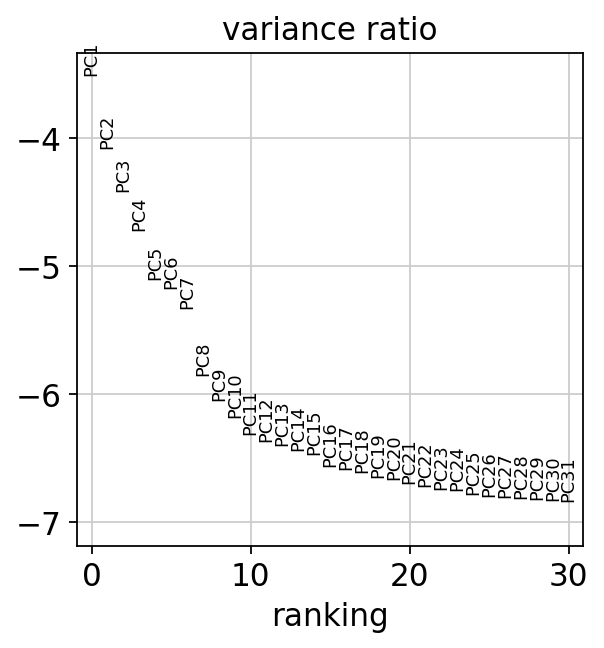

In [41]:
sc.pl.pca(adata, color="total_counts")
sc.pl.pca(adata, color="PARK7")
sc.pl.pca_variance_ratio(adata, log=True)

## 1.2 t-SNE

In [43]:
sc.tl.tsne(adata, use_rep="X_pca")

computing tSNE
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:38)


/home/training/miniconda3/envs/sc_py_training/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


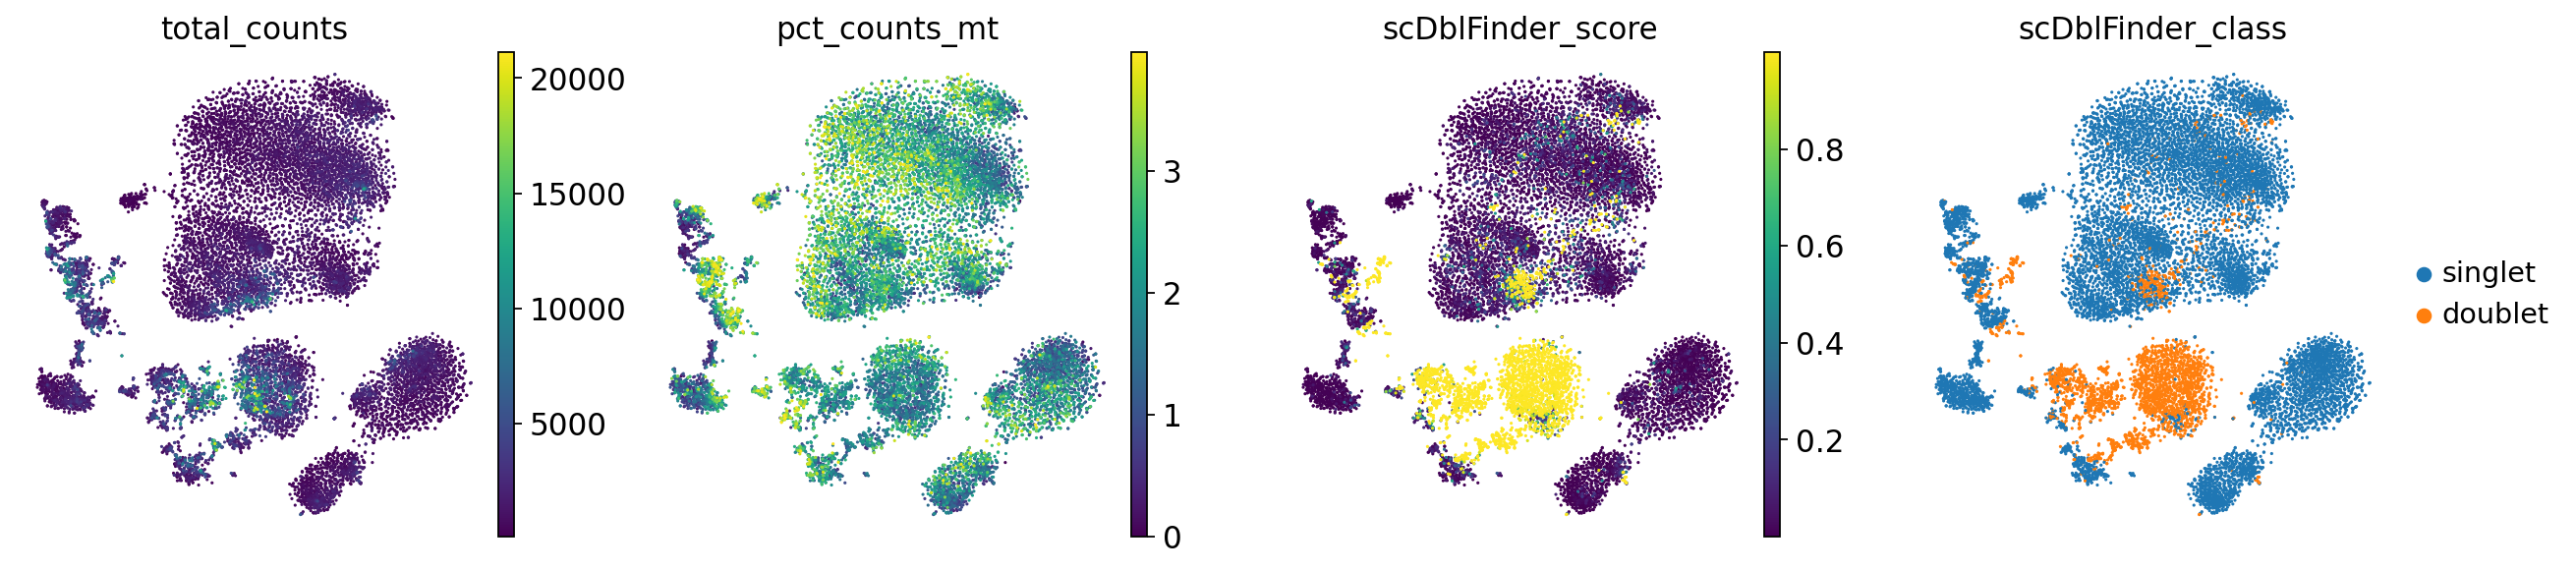

In [46]:
sc.pl.tsne(adata, color=["total_counts", "pct_counts_mt", "scDblFinder_score", "scDblFinder_class"])

## 2.3 UMAP

In [47]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50


/home/training/miniconda3/envs/sc_py_training/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/training/miniconda3/envs/sc_py_training/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/training/miniconda3/envs/sc_py_training/li

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:20)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


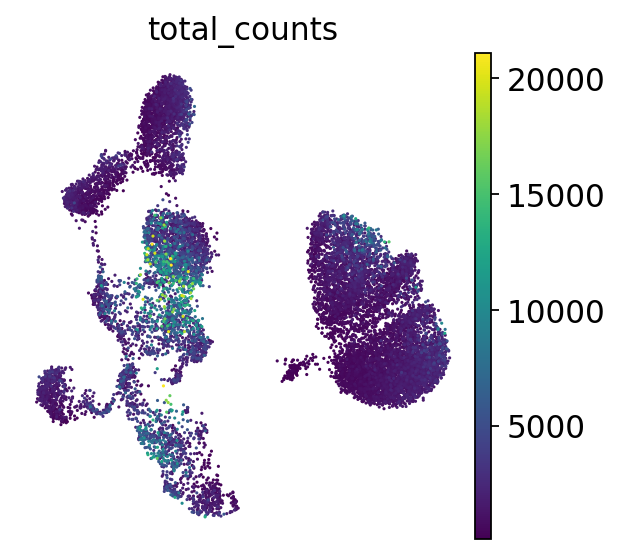

In [48]:
sc.pl.umap(adata, color="total_counts")

#### 5.4 Inspecting quality control metrics 

/home/training/miniconda3/envs/sc_py_training/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


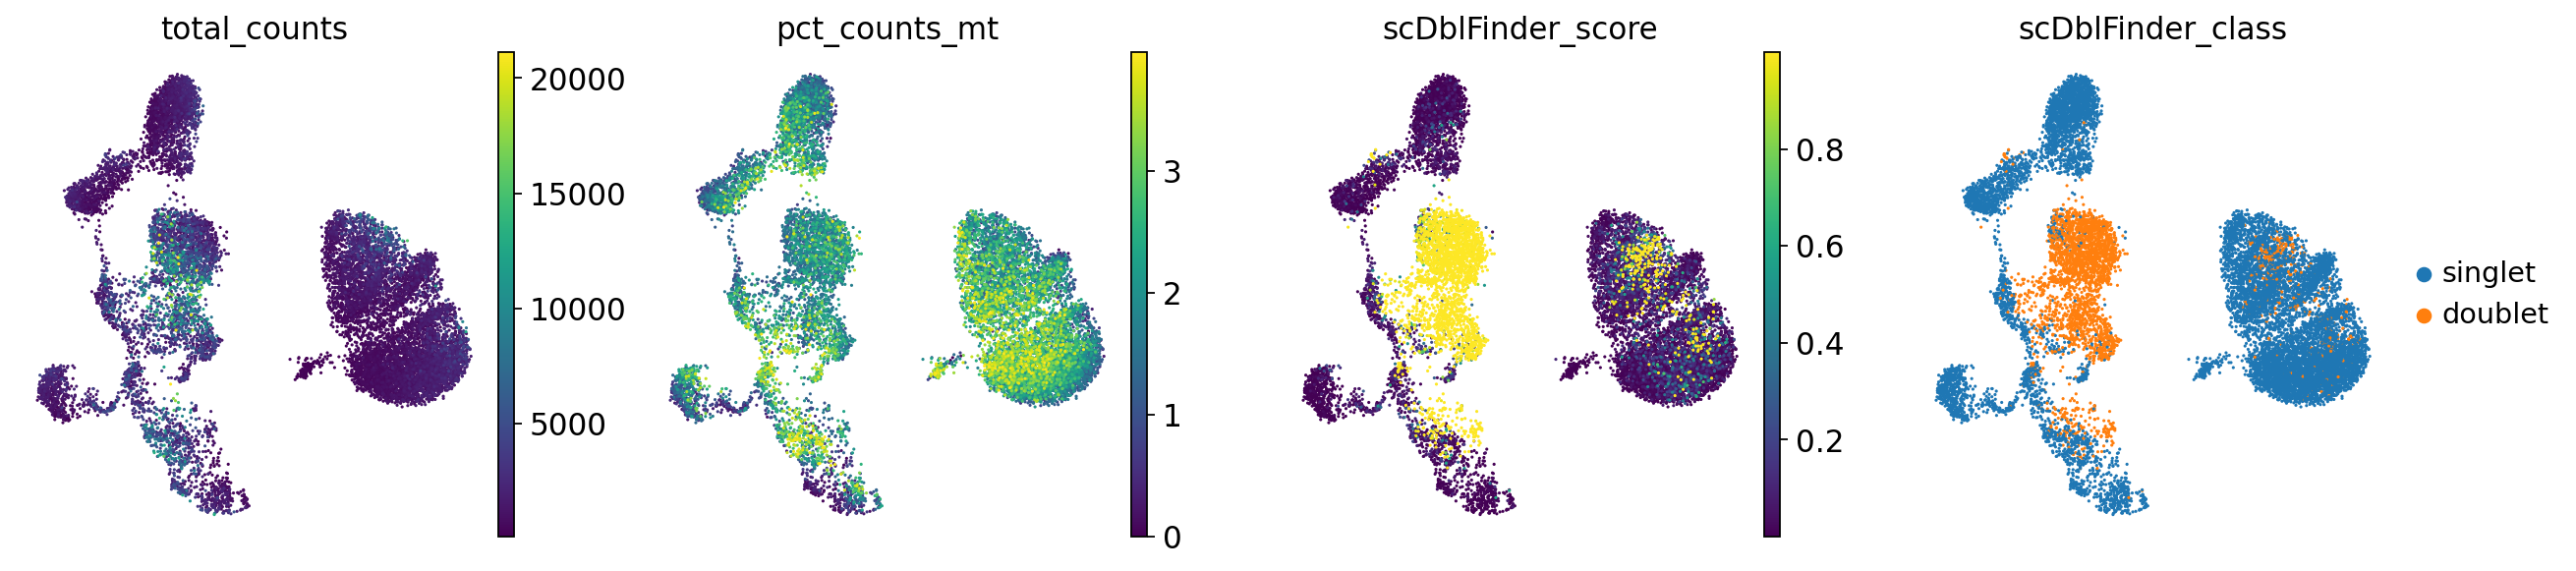

In [49]:
sc.pl.umap(
    adata,
    color=["total_counts", "pct_counts_mt", "scDblFinder_score", "scDblFinder_class"],
)

In [50]:
adata.write("s4d8_dimensionality_reduction.h5ad")

In [51]:
adata

AnnData object with n_obs × n_vars = 14814 × 20171
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'scDblFinder_score', 'scDblFinder_class', 'size_factors'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_deviant', 'binomial_deviance', 'highly_variable'
    uns: 'pca', 'tsne', 'scDblFinder_class_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'analytic_pearson_residuals', 'counts', 'log1p_norm', 'scran_normalization', 'soupX_counts'
    obsp: 'distances', 'connectivities'

## 2. Clustering

In [52]:
import scanpy as sc

sc.settings.verbosity = 0
sc.settings.set_figure_params(dpi=80, facecolor="white", frameon=False)

In [53]:
adata

AnnData object with n_obs × n_vars = 14814 × 20171
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'scDblFinder_score', 'scDblFinder_class', 'size_factors'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_deviant', 'binomial_deviance', 'highly_variable'
    uns: 'pca', 'tsne', 'scDblFinder_class_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'analytic_pearson_residuals', 'counts', 'log1p_norm', 'scran_normalization', 'soupX_counts'
    obsp: 'distances', 'connectivities'

In [67]:
# But where is s4d8_subset_gex.h5ad from?
# Load raw count data again 
adata = sc.read("s4d8_normalization.h5ad")

In [68]:
adata

AnnData object with n_obs × n_vars = 14814 × 20171
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'scDblFinder_score', 'scDblFinder_class', 'size_factors'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    layers: 'analytic_pearson_residuals', 'counts', 'log1p_norm', 'scran_normalization', 'soupX_counts'

In [ ]:
# Move X to another layer
adata.raw["counts_norm"] = adata.X

# Use the scran_normalization layer as the new main data layer, X
adata.X = adata.layers["scran_normalization"]
adata

In [ ]:
sc.pp.neighbors(adata, n_pcs=30)
sc.tl.umap(adata)

In [ ]:
sc.tl.leiden(adata)

In [ ]:
sc.tl.leiden(adata, key_added="leiden_res0_25", resolution=0.25)
sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata, key_added="leiden_res1", resolution=1.0)

In [ ]:
sc.pl.umap(
    adata,
    color=["leiden_res0_25", "leiden_res0_5", "leiden_res1"],
    legend_loc="on data",
)

## 3. Annotation

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

import numba
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning

warnings.simplefilter("ignore", category=NumbaDeprecationWarning)

In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
from scipy.sparse import csr_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# import celltypist
# from celltypist import models
# import scarches as sca
# import urllib.request

In [ ]:
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

In [ ]:
sc.set_figure_params(figsize=(5, 5))

In [ ]:
adata = sc.read(
    filename="s4d8_clustered.h5ad",
    backup_url="https://figshare.com/ndownloader/files/41436666",
)

In [ ]:
marker_genes = {
    "CD14+ Mono": ["FCN1", "CD14"],
    "CD16+ Mono": ["TCF7L2", "FCGR3A", "LYN"],
    "ID2-hi myeloid prog": [
        "CD14",
        "ID2",
        "VCAN",
        "S100A9",
        "CLEC12A",
        "KLF4",
        "PLAUR",
    ],
    "cDC1": ["CLEC9A", "CADM1"],
    "cDC2": [
        "CST3",
        "COTL1",
        "LYZ",
        "DMXL2",
        "CLEC10A",
        "FCER1A",
    ],  # Note: DMXL2 should be negative
    "Normoblast": ["SLC4A1", "SLC25A37", "HBB", "HBA2", "HBA1", "TFRC"],
    "Erythroblast": ["MKI67", "HBA1", "HBB"],
    "Proerythroblast": [
        "CDK6",
        "SYNGR1",
        "HBM",
        "GYPA",
    ],  # Note HBM and GYPA are negative markers
    "NK": ["GNLY", "NKG7", "CD247", "GRIK4", "FCER1G", "TYROBP", "KLRG1", "FCGR3A"],
    "ILC": ["ID2", "PLCG2", "GNLY", "SYNE1"],
    "Lymph prog": [
        "VPREB1",
        "MME",
        "EBF1",
        "SSBP2",
        "BACH2",
        "CD79B",
        "IGHM",
        "PAX5",
        "PRKCE",
        "DNTT",
        "IGLL1",
    ],
    "Naive CD20+ B": ["MS4A1", "IL4R", "IGHD", "FCRL1", "IGHM"],
    "B1 B": [
        "MS4A1",
        "SSPN",
        "ITGB1",
        "EPHA4",
        "COL4A4",
        "PRDM1",
        "IRF4",
        "CD38",
        "XBP1",
        "PAX5",
        "BCL11A",
        "BLK",
        "IGHD",
        "IGHM",
        "ZNF215",
    ],  # Note IGHD and IGHM are negative markers
    "Transitional B": ["MME", "CD38", "CD24", "ACSM3", "MSI2"],
    "Plasma cells": ["MZB1", "HSP90B1", "FNDC3B", "PRDM1", "IGKC", "JCHAIN"],
    "Plasmablast": ["XBP1", "RF4", "PRDM1", "PAX5"],  # Note PAX5 is a negative marker
    "CD4+ T activated": ["CD4", "IL7R", "TRBC2", "ITGB1"],
    "CD4+ T naive": ["CD4", "IL7R", "TRBC2", "CCR7"],
    "CD8+ T": ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "GZMA"],
    "T activation": ["CD69", "CD38"],  # CD69 much better marker!
    "T naive": ["LEF1", "CCR7", "TCF7"],
    "pDC": ["GZMB", "IL3RA", "COBLL1", "TCF4"],
    "G/M prog": ["MPO", "BCL2", "KCNQ5", "CSF3R"],
    "HSC": ["NRIP1", "MECOM", "PROM1", "NKAIN2", "CD34"],
    "MK/E prog": [
        "ZNF385D",
        "ITGA2B",
        "RYR3",
        "PLCB1",
    ],  # Note PLCB1 is a negative marker
}

In [ ]:
marker_genes_in_data = dict()
for ct, markers in marker_genes.items():
    markers_found = list()
    for marker in markers:
        if marker in adata.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

In [ ]:
adata.layers["counts"] = adata.X
adata.X = adata.layers["scran_normalization"]

In [ ]:
adata.var["highly_variable"] = adata.var["highly_deviant"]

In [ ]:
sc.tl.pca(adata, n_comps=50, use_highly_variable=True)

In [ ]:
sc.pp.neighbors(adata)

In [ ]:
sc.tl.umap(adata)

In [ ]:
B_plasma_cts = [
    "Naive CD20+ B",
    "B1 B",
    "Transitional B",
    "Plasma cells",
    "Plasmablast",
]

In [ ]:
for ct in B_plasma_cts:
    print(f"{ct.upper()}:")  # print cell subtype name
    sc.pl.umap(
        adata,
        color=marker_genes_in_data[ct],
        vmin=0,
        vmax="p99",  # set vmax to the 99th percentile of the gene count instead of the maximum, to prevent outliers from making expression in other cells invisible. Note that this can cause problems for extremely lowly expressed genes.
        sort_order=False,  # do not plot highest expression on top, to not get a biased view of the mean expression among cells
        frameon=False,
        cmap="Reds",  # or choose another color map e.g. from here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    )
    print("\n\n\n")  # print white space for legibility

In [ ]:
sc.tl.leiden(adata, resolution=1, key_added="leiden_1")

In [ ]:
sc.pl.umap(adata, color="leiden_1")

In [ ]:
sc.tl.leiden(adata, resolution=2, key_added="leiden_2")

In [ ]:
sc.pl.umap(adata, color="leiden_2")

In [ ]:
sc.pl.umap(adata, color="leiden_2", legend_loc="on data")

In [ ]:
B_plasma_markers = {
    ct: [m for m in ct_markers if m in adata.var.index]
    for ct, ct_markers in marker_genes.items()
    if ct in B_plasma_cts
}

In [ ]:
sc.pl.dotplot(
    adata,
    groupby="leiden_2",
    var_names=B_plasma_markers,
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
)

In [ ]:
cl_annotation = {
    "4": "Naive CD20+ B",
    "6": "Naive CD20+ B",
    "8": "Transitional B",
    "18": "B1 B",  # note that IGHD and IGHM are negative markers, in this case more lowly expressed than in the other B cell clusters
}

In [ ]:
adata.obs["manual_celltype_annotation"] = adata.obs.leiden_2.map(cl_annotation)

In [ ]:
sc.pl.umap(adata, color=["manual_celltype_annotation"])

In [ ]:
sc.tl.rank_genes_groups(
    adata, groupby="leiden_2", method="wilcoxon", key_added="dea_leiden_2"
)

In [ ]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_2", standard_scale="var", n_genes=5, key="dea_leiden_2"
)

In [ ]:
sc.tl.filter_rank_genes_groups(
    adata,
    min_in_group_fraction=0.2,
    max_out_group_fraction=0.2,
    key="dea_leiden_2",
    key_added="dea_leiden_2_filtered",
)

In [ ]:
sc.pl.rank_genes_groups_dotplot(
    adata,
    groupby="leiden_2",
    standard_scale="var",
    n_genes=5,
    key="dea_leiden_2_filtered",
)

In [ ]:
sc.pl.umap(
    adata,
    color=["CDK6", "ETV6", "NKAIN2", "GNAQ", "leiden_2"],
    vmax="p99",
    legend_loc="on data",
    frameon=False,
    cmap="Reds",
)

In [ ]:
sc.pl.umap(
    adata,
    color=[
        "ZNF385D",
        "ITGA2B",
        "RYR3",
        "PLCB1",
    ],
    vmax="p99",
    legend_loc="on data",
    frameon=False,
    cmap="Reds",
)

In [ ]:
cl_annotation["12"] = "HSCs + MK/E prog (?)"

In [ ]:
adata.obs["manual_celltype_annotation"] = adata.obs.leiden_2.map(cl_annotation)